### Import libraries

In [1]:
# usual libraries
import requests
import os
import time
import numpy as np 
import pandas as pd
from collections import Counter
# visualize libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#ast
import ast
#wordcloud
from wordcloud import WordCloud
# add view settings
pd.options.display.max_columns = None
pd.options.display.max_rows = None
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

### 1. Parse vacancies from hh.ru and save in file

In [3]:
# Number of region: 113-all Russia, 1- Moscow, 2-St.Petersburg, 3-Ekaterinburg, 4-Novosibirsk, 88-Kazan
region_number = 113
# Vacancie Name
job_title = ['Data Scientist']
# Maximum vacancies range - 30 days!
time_period = 30

In [4]:
class HHVacanciesParseWithAPI:
    def __init__(self, area_number, period=None):
        self.area_number = area_number
        self._url = 'https://api.hh.ru/vacancies'
        if period is None:
            self.period = 30
        else:
            self.period = period

    def save_vacancies_data_into_dataframe(self, vacancy_name, vacancies_list):
        vacancy_additional_details = requests.get(vacancies_list[0]['items'][0]['url']).json().keys()
        df = pd.DataFrame(columns=list(vacancy_additional_details))
        ind = 0
        for i in range(len(vacancies_list)):
            for j in range(len(vacancies_list[i]['items'])):
                additional_vacancies_data = requests.get(vacancies_list[i]['items'][j]['url']).json()
                time.sleep(0.5)
                df.loc[ind] = additional_vacancies_data
                print(f'Add info for {ind+1} vacancies into dataframe!')
                ind += 1
        csv_name = f'{vacancy_name}_{self.area_number}.csv'
        df.to_csv(csv_name, index=False)
        print(f'Save vacancies in file: {csv_name}')

    def collect_vacancies_data_into_list(self, job_name):
        try:
            vacancies_data_list = []
            common_get_request_params = {'text': job_name, 'area': self.area_number, 'period': self.period}
            vacancies_data = requests.get(self._url, params=common_get_request_params).json()
            vacancies_data_number_of_pages = vacancies_data['pages']
            for one_page in range(int(vacancies_data_number_of_pages)):
                get_request_params = {'text': job_name, 'area': self.area_number, 'period': self.period, 'page': one_page}
                vacancies_data_from_one_page = requests.get(self._url, params=get_request_params).json()
                vacancies_data_list.append(vacancies_data_from_one_page)
                print(f'Count of parsed vacancies pages: {one_page + 1}')
                time.sleep(0.5)
            self.save_vacancies_data_into_dataframe(job_name, vacancies_data_list)
        except Exception as exc:
            with open(os.path.join(os.getcwd(), 'log.txt'), 'a') as log_file:
                log_file.write(f'Happen exception {exc} with arguments {exc.args} \n')

In [5]:
vacancies_parser_obj = HHVacanciesParseWithAPI(region_number, time_period)
for one_job_name in job_title:
    vacancies_parser_obj.collect_vacancies_data_into_list(one_job_name)
    print(f'Processed {one_job_name} vacancy!')

Count of parsed vacancies pages: 1
Count of parsed vacancies pages: 2
Count of parsed vacancies pages: 3
Count of parsed vacancies pages: 4
Count of parsed vacancies pages: 5
Count of parsed vacancies pages: 6
Count of parsed vacancies pages: 7
Count of parsed vacancies pages: 8
Count of parsed vacancies pages: 9
Count of parsed vacancies pages: 10
Count of parsed vacancies pages: 11
Count of parsed vacancies pages: 12
Count of parsed vacancies pages: 13
Count of parsed vacancies pages: 14
Count of parsed vacancies pages: 15
Count of parsed vacancies pages: 16
Count of parsed vacancies pages: 17
Count of parsed vacancies pages: 18
Count of parsed vacancies pages: 19
Count of parsed vacancies pages: 20
Count of parsed vacancies pages: 21
Count of parsed vacancies pages: 22
Count of parsed vacancies pages: 23
Count of parsed vacancies pages: 24
Count of parsed vacancies pages: 25
Add info for 1 vacancies into dataframe!
Add info for 2 vacancies into dataframe!
Add info for 3 vacancies in

Add info for 174 vacancies into dataframe!
Add info for 175 vacancies into dataframe!
Add info for 176 vacancies into dataframe!
Add info for 177 vacancies into dataframe!
Add info for 178 vacancies into dataframe!
Add info for 179 vacancies into dataframe!
Add info for 180 vacancies into dataframe!
Add info for 181 vacancies into dataframe!
Add info for 182 vacancies into dataframe!
Add info for 183 vacancies into dataframe!
Add info for 184 vacancies into dataframe!
Add info for 185 vacancies into dataframe!
Add info for 186 vacancies into dataframe!
Add info for 187 vacancies into dataframe!
Add info for 188 vacancies into dataframe!
Add info for 189 vacancies into dataframe!
Add info for 190 vacancies into dataframe!
Add info for 191 vacancies into dataframe!
Add info for 192 vacancies into dataframe!
Add info for 193 vacancies into dataframe!
Add info for 194 vacancies into dataframe!
Add info for 195 vacancies into dataframe!
Add info for 196 vacancies into dataframe!
Add info fo

Add info for 365 vacancies into dataframe!
Add info for 366 vacancies into dataframe!
Add info for 367 vacancies into dataframe!
Add info for 368 vacancies into dataframe!
Add info for 369 vacancies into dataframe!
Add info for 370 vacancies into dataframe!
Add info for 371 vacancies into dataframe!
Add info for 372 vacancies into dataframe!
Add info for 373 vacancies into dataframe!
Add info for 374 vacancies into dataframe!
Add info for 375 vacancies into dataframe!
Add info for 376 vacancies into dataframe!
Add info for 377 vacancies into dataframe!
Add info for 378 vacancies into dataframe!
Add info for 379 vacancies into dataframe!
Add info for 380 vacancies into dataframe!
Add info for 381 vacancies into dataframe!
Add info for 382 vacancies into dataframe!
Add info for 383 vacancies into dataframe!
Add info for 384 vacancies into dataframe!
Add info for 385 vacancies into dataframe!
Add info for 386 vacancies into dataframe!
Add info for 387 vacancies into dataframe!
Add info fo

### 2. Read, prepare and clear data

In [5]:
ds_vacancies_data = pd.read_csv('Data Scientist_113.csv', dayfirst=True, parse_dates=['published_at'])
ds_vacancies_data.head()

,id,premium,billing_type,relations,name,insider_interview,response_letter_required,area,salary,type,address,allow_messages,site,experience,schedule,employment,department,contacts,description,branded_description,vacancy_constructor_template,key_skills,accept_handicapped,accept_kids,archived,response_url,specializations,code,hidden,quick_responses_allowed,driver_license_types,accept_incomplete_resumes,employer,published_at,created_at,negotiations_url,suitable_resumes_url,apply_alternate_url,has_test,test,alternate_url,working_days,working_time_intervals,working_time_modes,accept_temporary
0,40871569,False,"{'id': 'standard_plus', 'name': 'Стандарт плюс'}",[],Middle/Senior Data Scientist,NaN,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 200000, 'to': None, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}","{'city': 'Москва', 'street': 'улица Бутлерова'...",True,"{'id': 'hh', 'name': 'hh.ru'}","{'id': 'between1And3', 'name': 'От 1 года до 3...","{'id': 'fullDay', 'name': 'Полный день'}","{'id': 'full', 'name': 'Полная занятость'}",NaN,NaN,<p><strong>Gradient - cамый популярный фоторед...,NaN,NaN,"[{'name': 'Математическая статистика'}, {'name...",False,False,False,NaN,"[{'id': '1.221', 'name': 'Программирование, Ра...",NaN,False,False,[],False,"{'id': '4111056', 'name': 'Gradient', 'url': '...",2020-12-11 16:10:39+03:00,2020-12-11T16:10:39+0300,NaN,NaN,https://hh.ru/applicant/vacancy_response?vacan...,False,NaN,https://hh.ru/vacancy/40871569,[],[],[],False
1,38576646,False,"{'id': 'standard_plus', 'name': 'Стандарт плюс'}",[],Data Scientist (middle or senior),NaN,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': None, 'to': 500000, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}",NaN,True,"{'id': 'hh', 'name': 'hh.ru'}","{'id': 'between3And6', 'name': 'От 3 до 6 лет'}","{'id': 'flexible', 'name': 'Гибкий график'}","{'id': 'full', 'name': 'Полная занятость'}",NaN,NaN,<p><strong>Наша компания разрабатывает аналити...,NaN,NaN,"[{'name': 'Python'}, {'name': 'Data Mining'}, ...",False,False,False,NaN,"[{'id': '1.221', 'name': 'Программирование, Ра...",NaN,False,False,[],False,"{'id': '2223982', 'name': 'РАБЛЗ', 'url': 'htt...",2020-12-11 14:38:18+03:00,2020-12-11T14:38:18+0300,NaN,NaN,https://hh.ru/applicant/vacancy_response?vacan...,False,NaN,https://hh.ru/vacancy/38576646,[],[],[],False
2,40118563,False,"{'id': 'standard', 'name': 'Стандарт'}",[],"Data Scientist (Кипр, удаленно)",NaN,False,"{'id': '4', 'name': 'Новосибирск', 'url': 'htt...","{'from': 3500, 'to': 3800, 'currency': 'EUR', ...","{'id': 'open', 'name': 'Открытая'}",NaN,True,"{'id': 'hh', 'name': 'hh.ru'}","{'id': 'between3And6', 'name': 'От 3 до 6 лет'}","{'id': 'remote', 'name': 'Удаленная работа'}","{'id': 'full', 'name': 'Полная занятость'}",NaN,NaN,"<p>Крупная финтех компания, работающая на межд...",NaN,NaN,"[{'name': 'Python'}, {'name': 'Математическая ...",False,False,False,NaN,"[{'id': '1.25', 'name': 'Аналитик', 'profarea_...",NaN,False,False,[],False,"{'id': '48184', 'name': 'Кадровое агентство Ал...",2020-12-11 10:14:27+03:00,2020-12-11T10:14:27+0300,NaN,NaN,https://hh.ru/applicant/vacancy_response?vacan...,False,NaN,https://hh.ru/vacancy/40118563,[],[],[],False
3,40966597,False,"{'id': 'standard_plus', 'name': 'Стандарт плюс'}",[],Data Scientist,NaN,False,"{'id': '2', 'name': 'Санкт-Петербург', 'url': ...","{'from': 150000, 'to': 200000, 'currency': 'RU...","{'id': 'open', 'name': 'Открытая'}","{'city': 'Санкт-Петербург', 'street': 'Чкаловс...",True,"{'id': 'hh', 'name': 'hh.ru'}","{'id': 'between1And3', 'name': 'От 1 года до 3...","{'id': 'fullDay', 'name': 'Полный день'}","{'id': 'full', 'name': 'Полная занятость'}",NaN,NaN,"<p>Мы - <strong>«Софтвайс»</strong>, и мы зани...",NaN,NaN,"[{'name': 'Python'}, {'name': 'Big Data'}, {'n...",False,False,False,NaN,"[{'id': '1.221', 'name': 'Программирование, Ра...",NaN,False,False,[],False,"{'id': '4295296', 'name': 'Софтвайс', 'url': '...",2020-12-12 13:31:3

#### Select important columns

In [6]:
cut_ds_data = ds_vacancies_data[['employer', 'area', 'name', 'salary', 'experience', 'schedule', 'description', 'key_skills', 'published_at']].copy()
cut_ds_data.head()

,employer,area,name,salary,experience,schedule,description,key_skills,published_at
0,"{'id': '4111056', 'name': 'Gradient', 'url': '...","{'id': '1', 'name': 'Москва', 'url': 'https://...",Middle/Senior Data Scientist,"{'from': 200000, 'to': None, 'currency': 'RUR'...","{'id': 'between1And3', 'name': 'От 1 года до 3...","{'id': 'fullDay', 'name': 'Полный день'}",<p><strong>Gradient - cамый популярный фоторед...,"[{'name': 'Математическая статистика'}, {'name...",2020-12-11 16:10:39+03:00
1,"{'id': '2223982', 'name': 'РАБЛЗ', 'url': 'htt...","{'id': '1', 'name': 'Москва', 'url': 'https://...",Data Scientist (middle or senior),"{'from': None, 'to': 500000, 'currency': 'RUR'...","{'id': 'between3And6', 'name': 'От 3 до 6 лет'}","{'id': 'flexible', 'name': 'Гибкий график'}",<p><strong>Наша компания разрабатывает аналити...,"[{'name': 'Python'}, {'name': 'Data Mining'}, ...",2020-12-11 14:38:18+03:00
2,"{'id': '48184', 'name': 'Кадровое агентство Ал...","{'id': '4', 'name': 'Новосибирск', 'url': 'htt...","Data Scientist (Кипр, удаленно)","{'from': 3500, 'to': 3800, 'currency': 'EUR', ...","{'id': 'between3And6', 'name': 'От 3 до 6 лет'}","{'id': 'remote', 'name': 'Удаленная работа'}","<p>Крупная финтех компания, работающая на межд...","[{'name': 'Python'}, {'name': 'Математическая ...",2020-12-11 10:14:27+03:00
3,"{'id': '4295296', 'name': 'Софтвайс', 'url': '...","{'id': '2', 'name': 'Санкт-Петербург', 'url': ...",Data Scientist,"{'from': 150000, 'to': 200000, 'currency': 'RU...","{'id': 'between1And3', 'name': 'От 1 года до 3...","{'id': 'fullDay', 'name': 'Полный день'}","<p>Мы - <strong>«Софтвайс»</strong>, и мы зани...","[{'name': 'Python'}, {'name': 'Big Data'}, {'n...",2020-12-12 13:31:35+03:00
4,"{'id': '4588942', 'name': 'Медицинские Скринин...","{'id': '2', 'name': 'Санкт-Петербург', 'url': ...",Специалист Computer Vision (Data Scientist) - ...,"{'from': 130000, 'to': 300000, 'currency': 'RU...","{'id': 'noExperience', 'name': 'Нет опыта'}","{'id': 'fullDay', 'name': 'Полный день'}",<p><em>Если вы хотите решать интересные задачи...,"[{'name': 'pytorch'}, {'name': 'data science'}...",2020-12-10 11:37:07+03:00


#### Modify selected data

In [7]:
cut_ds_data['employer'] = cut_ds_data['employer'].apply(lambda x: ast.literal_eval(x)['name'])
cut_ds_data['area'] = cut_ds_data['area'].apply(lambda x: ast.literal_eval(x)['name'])
cut_ds_data['experience'] = cut_ds_data['experience'].apply(lambda x: ast.literal_eval(x)['name'])
cut_ds_data['schedule'] = cut_ds_data['schedule'].apply(lambda x: ast.literal_eval(x)['name'])
cut_ds_data['key_skills'] = cut_ds_data['key_skills'].apply(lambda x: [v for v_dict in ast.literal_eval(x) for _, v in v_dict.items()])
cut_ds_data['description'] = cut_ds_data['description'].apply(lambda x: x if x is not None and len(x)>50 else None)
cut_ds_data = cut_ds_data.replace(to_replace='None', value=np.nan).dropna(subset=['description'])
cut_ds_data.reset_index(drop=True, inplace=True)
cut_ds_data.head()
cut_ds_data.info()

,employer,area,name,salary,experience,schedule,description,key_skills,published_at
0,Gradient,Москва,Middle/Senior Data Scientist,"{'from': 200000, 'to': None, 'currency': 'RUR'...",От 1 года до 3 лет,Полный день,<p><strong>Gradient - cамый популярный фоторед...,"[Математическая статистика, Математический ана...",2020-12-11 16:10:39+03:00
1,РАБЛЗ,Москва,Data Scientist (middle or senior),"{'from': None, 'to': 500000, 'currency': 'RUR'...",От 3 до 6 лет,Гибкий график,<p><strong>Наша компания разрабатывает аналити...,"[Python, Data Mining, SQL, Математическое моде...",2020-12-11 14:38:18+03:00
2,Кадровое агентство Алексея Сухорукова,Новосибирск,"Data Scientist (Кипр, удаленно)","{'from': 3500, 'to': 3800, 'currency': 'EUR', ...",От 3 до 6 лет,Удаленная работа,"<p>Крупная финтех компания, работающая на межд...","[Python, Математическая статистика, SQL, Матем...",2020-12-11 10:14:27+03:00
3,Софтвайс,Санкт-Петербург,Data Scientist,"{'from': 150000, 'to': 200000, 'currency': 'RU...",От 1 года до 3 лет,Полный день,"<p>Мы - <strong>«Софтвайс»</strong>, и мы зани...","[Python, Big Data, Tableau, Базы данных]",2020-12-12 13:31:35+03:00
4,Медицинские Скрининг Системы,Санкт-Петербург,Специалист Computer Vision (Data Scientist) - ...,"{'from': 130000, 'to': 300000, 'currency': 'RU...",Нет опыта,Полный день,<p><em>Если вы хотите решать интересные задачи...,"[pytorch, data science, tensorflow, gun, deep ...",2020-12-10 11:37:07+03:00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434 entries, 0 to 433
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype                                
---  ------        --------------  -----                                
 0   employer      434 non-null    object                               
 1   area          434 non-null    object                               
 2   name          434 non-null    object                               
 3   salary        47 non-null     object                               
 4   experience    434 non-null    object                               
 5   schedule      434 non-null    object                               
 6   description   434 non-null    object                               
 7   key_skills    434 non-null    object                               
 8   published_at  434 non-null    datetime64[ns, pytz.FixedOffset(180)]
dtypes: datetime64[ns, pytz.FixedOffset(180)](1), object(8)
memory usage: 30.6+ KB


### 3. Build a wordcloud from key skills

#### Count a key skills word frequency for build a wordcloud

In [8]:
bag_words = []
for vacancy_key_skills in cut_ds_data['key_skills'].values:
    for one_word in vacancy_key_skills:
        bag_words.append(one_word)

In [9]:
counter_words_dict = Counter(bag_words)
counter_words_dict.most_common(20)

[('Python', 241),
 ('SQL', 152),
 ('Data Mining', 62),
 ('Математическая статистика', 49),
 ('Анализ данных', 39),
 ('C++', 38),
 ('Английский язык', 37),
 ('Git', 34),
 ('MS SQL', 34),
 ('Big Data', 33),
 ('Linux', 30),
 ('Machine Learning', 22),
 ('Java', 22),
 ('Data Science', 21),
 ('Data Analysis', 21),
 ('Google Analytics', 21),
 ('Spark', 19),
 ('Базы данных', 18),
 ('Hadoop', 18),
 ('Математическое моделирование', 17)]

In [12]:
mc = sorted(counter_words_dict.items(), key=lambda k_v: k_v[1], reverse=True)[:50]

In [13]:
mc_dict = {one_row[0] : one_row[1] for one_row in mc}
mc_dict

{'Python': 241,
 'SQL': 152,
 'Data Mining': 62,
 'Математическая статистика': 49,
 'Анализ данных': 39,
 'C++': 38,
 'Английский язык': 37,
 'Git': 34,
 'MS SQL': 34,
 'Big Data': 33,
 'Linux': 30,
 'Machine Learning': 22,
 'Java': 22,
 'Data Science': 21,
 'Data Analysis': 21,
 'Google Analytics': 21,
 'Spark': 19,
 'Базы данных': 18,
 'Hadoop': 18,
 'Математическое моделирование': 17,
 'MATLAB': 17,
 'NLP': 17,
 'Разработка технических заданий': 17,
 'MS Access': 15,
 'Advertising': 15,
 'Математический анализ': 14,
 'R': 14,
 'Статистический анализ': 13,
 'Product Management': 13,
 'ML': 12,
 'Математическое программирование': 12,
 'PyTorch': 12,
 'Amplitude': 12,
 'Яндекс.Метрика': 12,
 'Pandas': 11,
 'ETL': 11,
 'SCALA': 10,
 'Teamleading': 10,
 'Project management': 10,
 'Agile Project Management': 10,
 'PostgreSQL': 10,
 'Работа в команде': 9,
 'machine learning': 9,
 'Обучение и развитие': 9,
 'ORACLE': 9,
 'Google AdWords': 9,
 'Internet Marketing': 9,
 'Работа с базами данны

#### Plot a WordCloud with most important Data Scientist key skills

<Figure size 2160x2160 with 0 Axes>

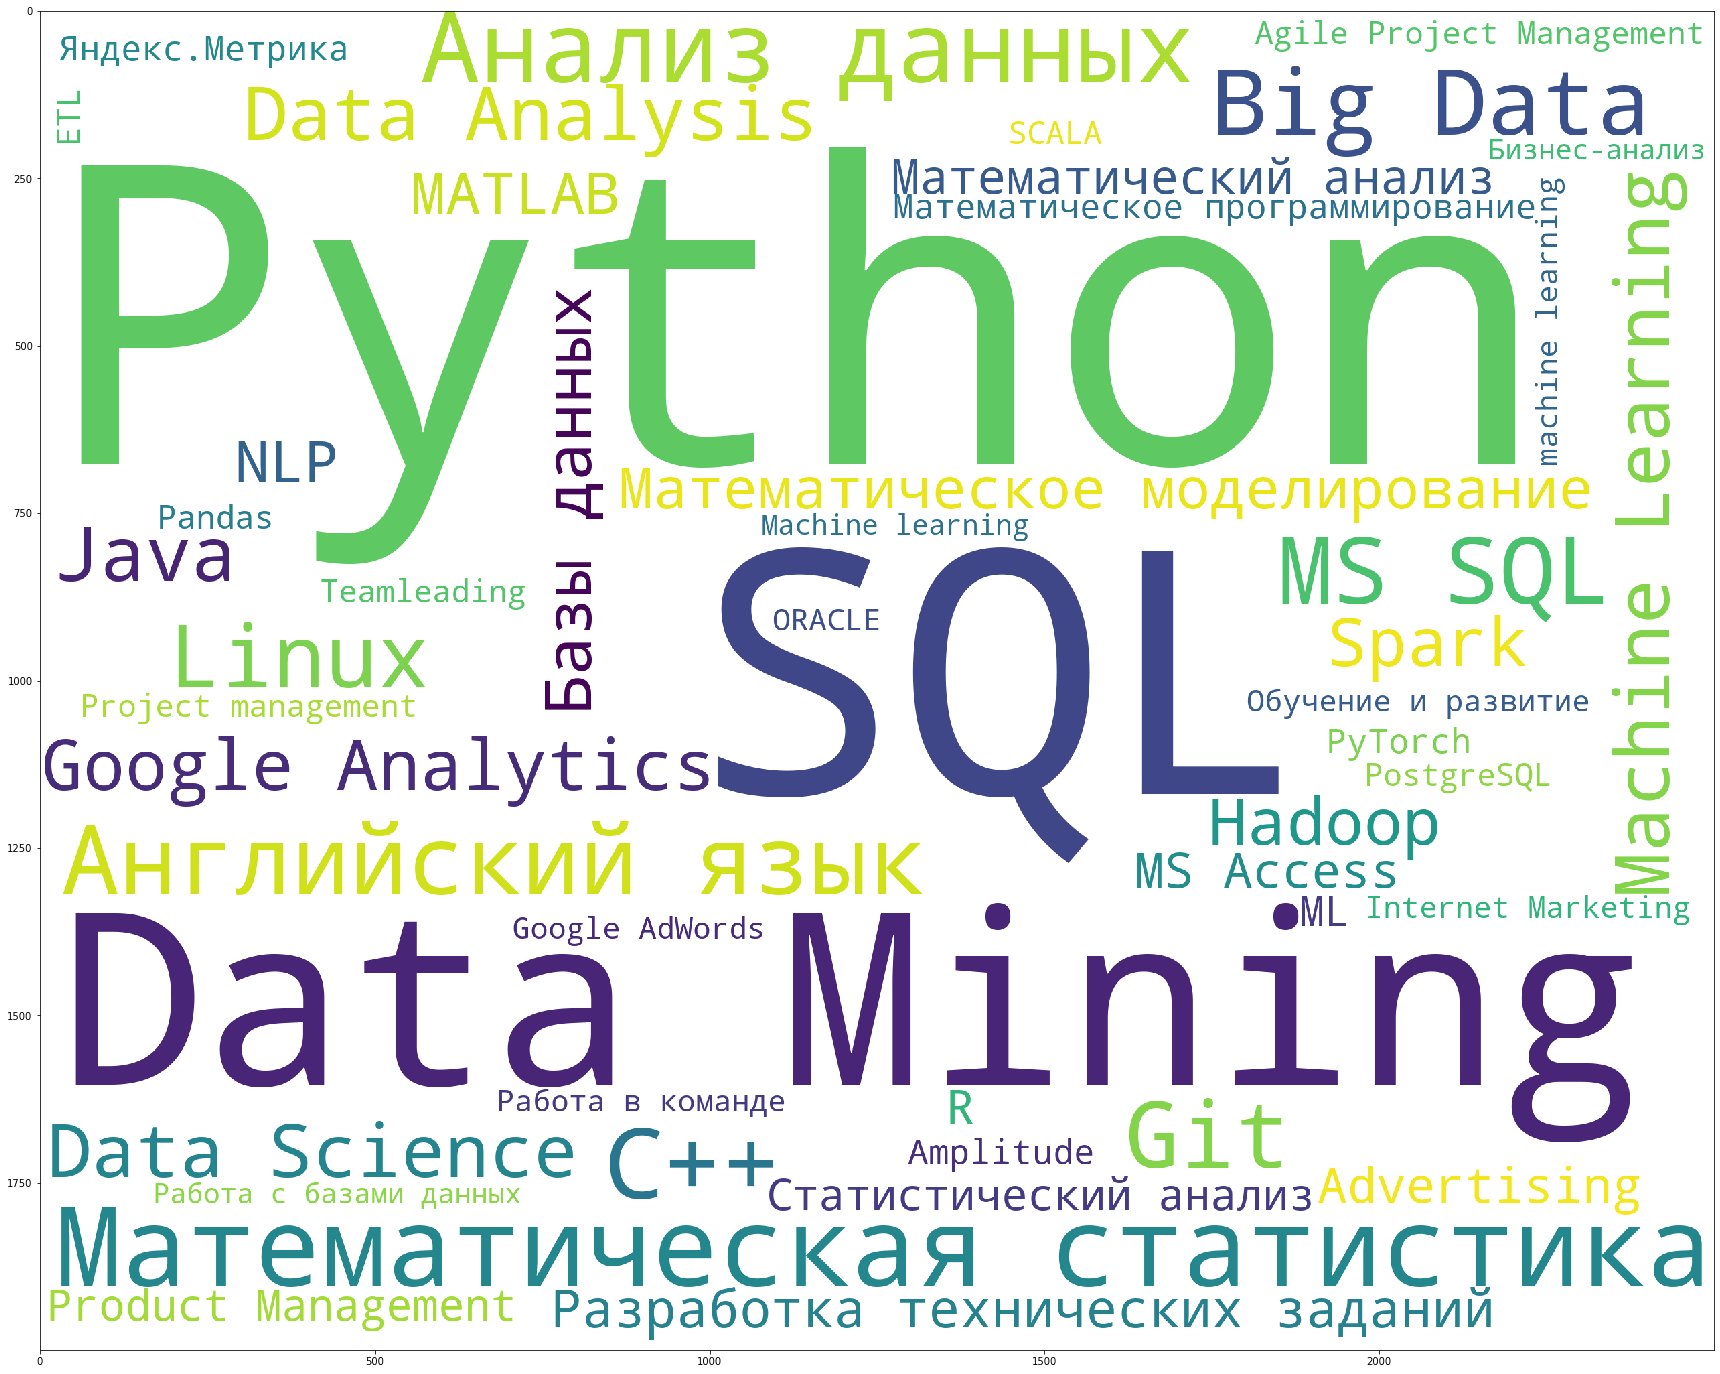

In [14]:
wordcloud = WordCloud(width = 2500, height = 2000, min_font_size = 8, background_color='white').generate_from_frequencies(mc_dict)
plt.figure(figsize = (30, 30)) 
plt.imshow(wordcloud)
plt.savefig('data_scientist_top_50_skills.pdf')

### 4. Compute median Data Scientist salary in rubles for most biggest cities.

#### Select the biggest cities for computing median salary by city

In [15]:
ds_ekb_data = cut_ds_data[cut_ds_data['area']=='Екатеринбург'].copy()
ds_kazan_data = cut_ds_data[(cut_ds_data['area']=='Казань') | (cut_ds_data['area']=='Иннополис')].copy()
ds_nn_data = cut_ds_data[cut_ds_data['area']=='Нижний Новгород'].copy()
ds_novosib_data = cut_ds_data[cut_ds_data['area']=='Новосибирск'].copy()
ds_spb_data = cut_ds_data[cut_ds_data['area']=='Санкт-Петербург'].copy()
ds_msk_data = cut_ds_data[cut_ds_data['area']=='Москва'].copy()
city_ds_data_dict = {'Ekaterinburg':ds_ekb_data, 'Kazan':ds_kazan_data, 'N.Novgorod':ds_nn_data, 'Novosibirsk':ds_novosib_data, 'St.Petersburg':ds_spb_data, 'Moscow':ds_msk_data}

#### Modilfy salary column 
##### - Transfer salary gross to netto.
##### - If we have a a salary plug in vacancy we calculate a mean salary (to+from/2).

In [16]:
def salary_rows_modify(one_vacancie):
    if one_vacancie['gross'] == True:
            if (one_vacancie['from'] is not None) and (one_vacancie['to'] is not None):
                return round(((one_vacancie['to']*0.87) + (one_vacancie['from']*0.87))/2, 1) 
            elif (one_vacancie['from'] is None) and (one_vacancie['to'] is not None):
                return one_vacancie['to']*0.5*0.87
            elif (one_vacancie['from'] is not None) and (one_vacancie['to'] is None):
                return one_vacancie['from']*0.87
            else:
                pass
    else:
        if (one_vacancie['from'] is not None) and (one_vacancie['to'] is not None):
            return round((one_vacancie['to'] + one_vacancie['from'])/2, 1) 
        elif (one_vacancie['from'] is None) and (one_vacancie['to'] is not None):
            return one_vacancie['to']*0.5
        elif (one_vacancie['from'] is not None) and (one_vacancie['to'] is None):
            return one_vacancie['from']
        else:
            pass

In [17]:
compute_salary_df = cut_ds_data.copy()
compute_salary_df = compute_salary_df.dropna(subset=['salary'])
compute_salary_df['salary'] = compute_salary_df['salary'].apply(lambda x: salary_rows_modify(ast.literal_eval(x)) if ast.literal_eval(x)['currency']=='RUR' else None)
compute_salary_df = compute_salary_df.replace(to_replace='None', value=np.nan).dropna(subset=['salary'])
compute_salary_df.reset_index(drop=True, inplace=True)
compute_salary_df.head()

,employer,area,name,salary,experience,schedule,description,key_skills,published_at
0,Gradient,Москва,Middle/Senior Data Scientist,200000.0,От 1 года до 3 лет,Полный день,<p><strong>Gradient - cамый популярный фоторед...,"[Математическая статистика, Математический ана...",2020-12-11 16:10:39+03:00
1,РАБЛЗ,Москва,Data Scientist (middle or senior),217500.0,От 3 до 6 лет,Гибкий график,<p><strong>Наша компания разрабатывает аналити...,"[Python, Data Mining, SQL, Математическое моде...",2020-12-11 14:38:18+03:00
2,Софтвайс,Санкт-Петербург,Data Scientist,175000.0,От 1 года до 3 лет,Полный день,"<p>Мы - <strong>«Софтвайс»</strong>, и мы зани...","[Python, Big Data, Tableau, Базы данных]",2020-12-12 13:31:35+03:00
3,Медицинские Скрининг Системы,Санкт-Петербург,Специалист Computer Vision (Data Scientist) - ...,215000.0,Нет опыта,Полный день,<p><em>Если вы хотите решать интересные задачи...,"[pytorch, data science, tensorflow, gun, deep ...",2020-12-10 11:37:07+03:00
4,Arima-Analytics,Москва,Аналитик Data Scientist,39150.0,Нет опыта,Полный день,<strong>Обязанности:</strong> <p>Младший Анали...,"[Python, Data Mining, Математическая статистик...",2020-12-11 18:42:11+03:00


#### Plot the median salary by city on the boxplot

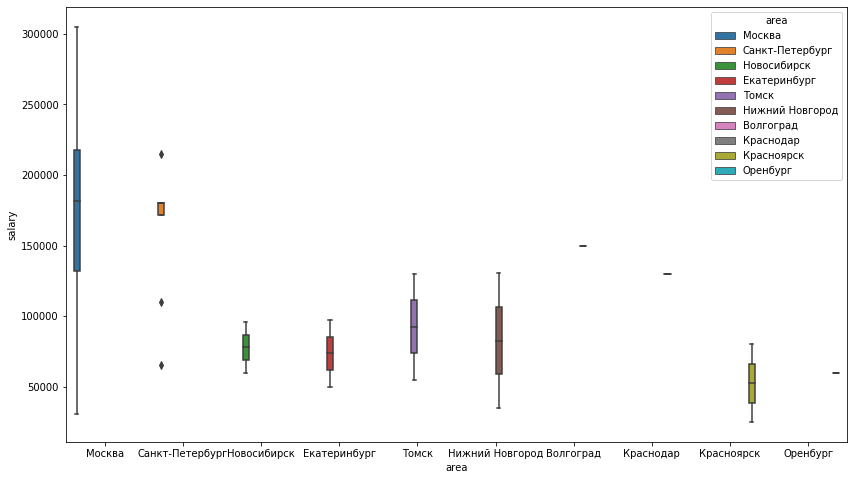

In [18]:
_, ax = plt.subplots(figsize=(14,8))
sns.boxplot(x='area', y='salary', data=compute_salary_df, hue='area', ax=ax)

#### Plot the median salary by experience on the boxplot

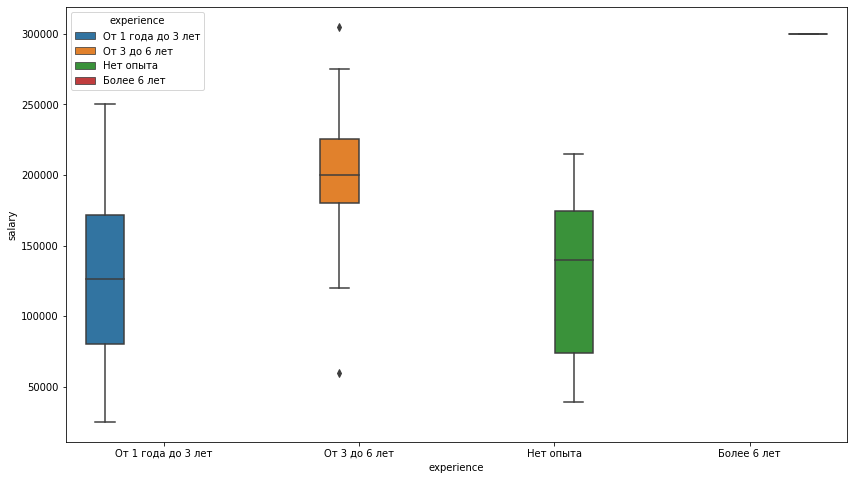

In [19]:
_, ax = plt.subplots(figsize=(14,8))
sns.boxplot(x='experience', y='salary', data=compute_salary_df, hue='experience', ax=ax)

#### Compute median salary for each biggest city

In [20]:
def compute_salary(rub_vacanices_list):
    vacancies_list = []
    for one_vacancie in rub_vacanices_list:
        if one_vacancie['gross'] == True:
            if (one_vacancie['from'] is not None) and (one_vacancie['to'] is not None):
                vacancies_list.append((one_vacancie['from']*0.87, one_vacancie['to']*0.87))
            elif (one_vacancie['from'] is None) and (one_vacancie['to'] is not None):
                vacancies_list.append(one_vacancie['to']*0.5*0.87)
            elif (one_vacancie['from'] is not None) and (one_vacancie['to'] is None):
                vacancies_list.append(one_vacancie['from']*0.87)
            else:
                pass
        else:
            if (one_vacancie['from'] is not None) and (one_vacancie['to'] is not None):
                vacancies_list.append((one_vacancie['from'], one_vacancie['to']))
            elif (one_vacancie['from'] is None) and (one_vacancie['to'] is not None):
                vacancies_list.append(one_vacancie['to']*0.5*0.87)
            elif (one_vacancie['from'] is not None) and (one_vacancie['to'] is None):
                vacancies_list.append(one_vacancie['from'])
            else:
                pass
    return list(map(np.median, vacancies_list))

In [21]:
def compute_median_salary_for_cities(cities_dict_df):
    salaries_city_dict = {}
    for city_label, city_df in cities_dict_df.items():
        salaries_data = city_df.salary.dropna()
        salary_list = compute_salary([ast.literal_eval(salaries_data.iloc[i]) for i in range(len(salaries_data)) if ast.literal_eval(salaries_data.iloc[i])['currency']=='RUR'])
        salaries_city_dict[city_label] = salary_list
        print(f'Median salary as Data Scientist in {city_label}: {round(np.mean(salary_list),2)} rub.')
    return salaries_city_dict

In [22]:
cities_salary_dict = compute_median_salary_for_cities(city_ds_data_dict)

Median salary as Data Scientist in Ekaterinburg: 73654.75 rub.
Median salary as Data Scientist in Kazan: nan rub.
Median salary as Data Scientist in N.Novgorod: 82650.0 rub.
Median salary as Data Scientist in Novosibirsk: 77850.0 rub.
Median salary as Data Scientist in St.Petersburg: 161897.22 rub.
Median salary as Data Scientist in Moscow: 178131.82 rub.


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
